# R spatial introduction

This notebook aims to provide a quick introduction to R spatial analysis and cartography.

R is a language dedicated to statitics and data analysis. It has also a lot of strong packages for spatial analysis.
Recent packages like {sf} allows easy [Simple Features](https://en.wikipedia.org/wiki/Simple_Features) manipulation.

This document is in a **writing stage**. If you want to contribute, please see the [Contact Us webpage](https://live.osgeo.org/en/contact.html)

This document aims to complete the [R Overview](http://localhost/osgeolive/en/overview/R_overview.html) and [R Quickstart](http://localhost/osgeolive/en/quickstart/R_quickstart.html). If you don't have read them, please consider doing it if you are new to R.

## Simple mapping

Let's reproduce the study case in the [PostGIS quickstart ](http://localhost/osgeolive/en/quickstart/postgis_quickstart.html).

We want to represent the sudden infant death syndrome (SIDS) in North Carolina (USA) data from the {spData} package.

More information about the dataset here:
[nowosad.github.io/spData/reference/nc.sids.html](https://nowosad.github.io/spData/reference/nc.sids.html)

### Needed libaries

R comes with a lot of packages to provides functionnalities. Those functions are stocked in libraries and in order to call them, you need to load them beforehand. To do so use the function *library(< package name >)* 

In [1]:
library('sf') #SimpleFeature Library to handle shapefiles
library('ggplot2') # Plotting library to create the maps

Linking to GEOS 3.6.2, GDAL 2.2.3, proj.4 4.9.3


In [2]:
options(jupyter.plot_mimetypes = 'image/png')

### Loading the data

We need to load the sids data that came from the *sids.shp* file. To do so, we'll use the function *sf::st_read()*.

In [3]:
sids <- st_read(dsn = "/usr/local/lib/R/site-library/spData/shapes/sids.shp" )

Reading layer `sids' from data source `/usr/local/lib/R/site-library/spData/shapes/sids.shp' using driver `ESRI Shapefile'
Simple feature collection with 100 features and 22 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -84.32385 ymin: 33.88199 xmax: -75.45698 ymax: 36.58965
epsg (SRID):    NA
proj4string:    NA


Let's have quick show of the data.

Of the 6 first rows

In [4]:
head(sids)

CNTY_ID,AREA,PERIMETER,CNTY_,NAME,FIPS,FIPSNO,CRESS_ID,BIR74,SID74,geometry,⋯,NWBIR79,east,north,x,y,lon,lat,L_id,M_id,geometry
1825,0.114,1.442,1825,Ashe,37009,37009,5,1091,1,MULTIPOLYGON (((-81.47276 3...,⋯,19,164,176,-81.67,4052.29,-81.48594,36.43940,1,2,MULTIPOLYGON (((-81.47276 3...
1827,0.061,1.231,1827,Alleghany,37005,37005,3,487,0,MULTIPOLYGON (((-81.23989 3...,⋯,12,183,182,-50.06,4059.70,-81.14061,36.52443,1,2,MULTIPOLYGON (((-81.23989 3...
1828,0.143,1.630,1828,Surry,37171,37171,86,3188,5,MULTIPOLYGON (((-80.45634 3...,⋯,260,204,174,-16.14,4043.76,-80.75312,36.40033,1,2,MULTIPOLYGON (((-80.45634 3...
1831,0.070,2.968,1831,Currituck,37053,37053,27,508,1,MULTIPOLYGON (((-76.00897 3...,⋯,145,461,182,406.01,4035.10,-76.04892,36.45655,1,4,MULTIPOLYGON (((-76.00897 3...
1832,0.153,2.206,1832,Northampton,37131,37131,66,1421,9,MULTIPOLYGON (((-77.21767 3...,⋯,1197,385,176,281.10,4029.75,-77.44057,36.38799,1,4,MULTIPOLYGON (((-77.21767 3...
1833,0.097,1.670,1833,Hertford,37091,37091,46,1452,7,MULTIPOLYGON (((-76.74506 3...,⋯,1237,411,176,323.77,4028.10,-76.96474,36.38189,1,4,MULTIPOLYGON (((-76.74506 3...


### Mapping
#### A basic Map
Let's see what it looks :

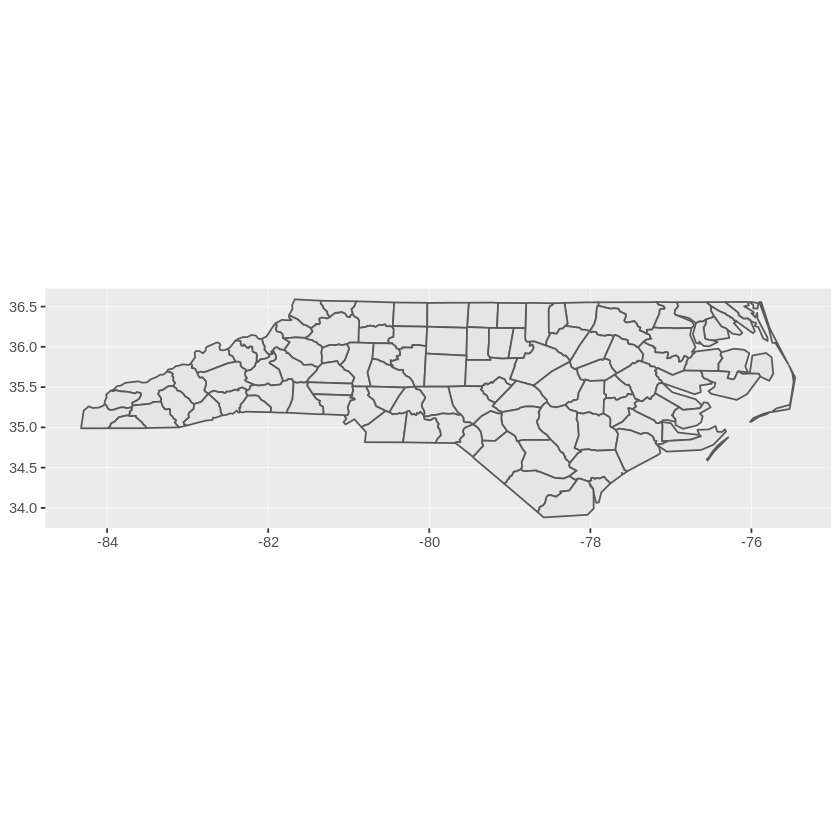

In [5]:
ggplot(sids)+
  geom_sf()

If we want to represent the rate of sids for the 1000 birth in the 1974 and 1978 period, we will use the data from the BIR74 and SID74 columns. In the quickstart, they represent counts with colors, as we don't want to offence geographers, lets use a ratio instead. So we want to create a new column with the 

In [6]:
sids['sids_rate74'] <- (sids['SID74'] * 1000)/ sids['BIR74']

Warning message in `[<-.data.frame`(`*tmp*`, "sids_rate74", value = structure(list(:
“provided 2 variables to replace 1 variables”

Let's see if our 

In [7]:
head(sids[,c(1,5,24)])

CNTY_ID,NAME,sids_rate74,geometry
1825,Ashe,0.9165903,MULTIPOLYGON (((-81.47276 3...
1827,Alleghany,0.0000000,MULTIPOLYGON (((-81.23989 3...
1828,Surry,1.5683814,MULTIPOLYGON (((-80.45634 3...
1831,Currituck,1.9685039,MULTIPOLYGON (((-76.00897 3...
1832,Northampton,6.3335679,MULTIPOLYGON (((-77.21767 3...
1833,Hertford,4.8209366,MULTIPOLYGON (((-76.74506 3...


How does it look like ? Lets add that to our map.

Here we will use several functions and parameters:

* ***ggplot(sids)*** -> we want to make plot of the SIDS dataset
* ***geom_sf(aes(fill = sids_rate74))*** -> we want to apply aestetics to the filling of the geometry using the data from sids_rate74 column
* ***scale_fill_viridis_c()*** -> with the viridis color scale dedicated to filling for continuous data

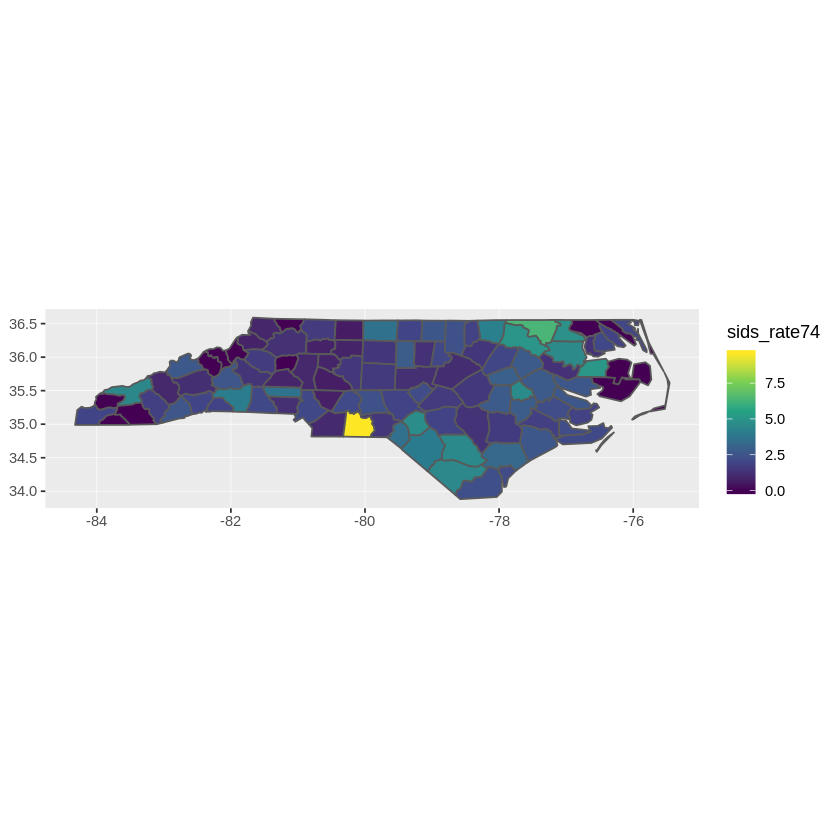

In [8]:
ggplot(sids)+
  geom_sf(aes(fill = sids_rate74))+
  scale_fill_viridis_c()

Not bad. Now we need some refinements like a title, some labels.
Those functions are provided by ggplot.

### Making a better map

First we should save the map in an object so we won't have to write all the code each time

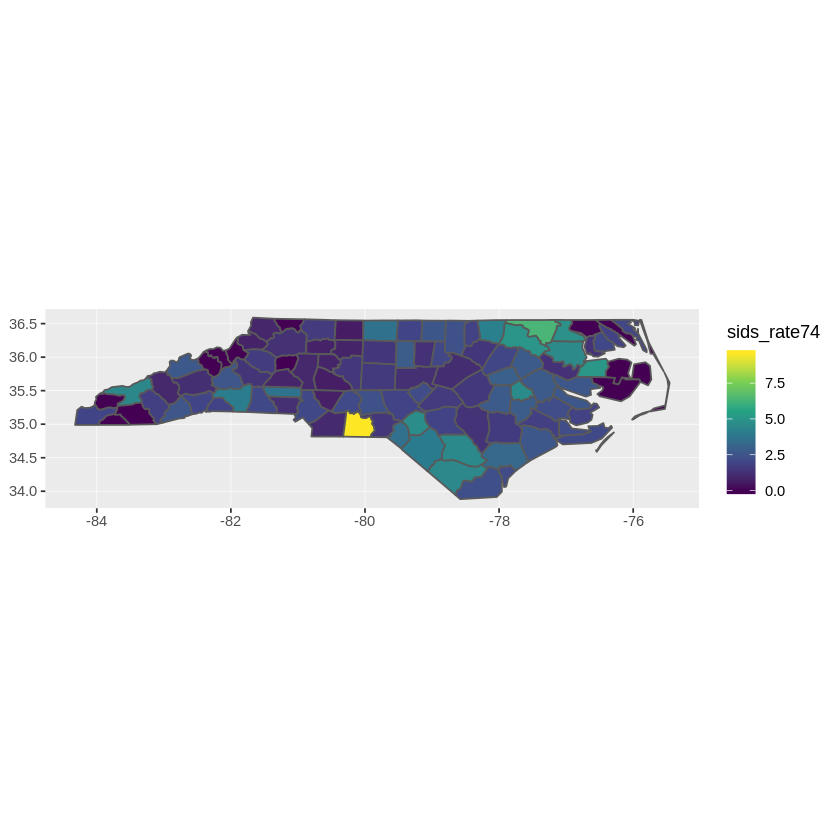

In [9]:
map <- ggplot(sids)+
  geom_sf(aes(fill = sids_rate74))+
  scale_fill_viridis_c()

map

Adding a title and a subtitle

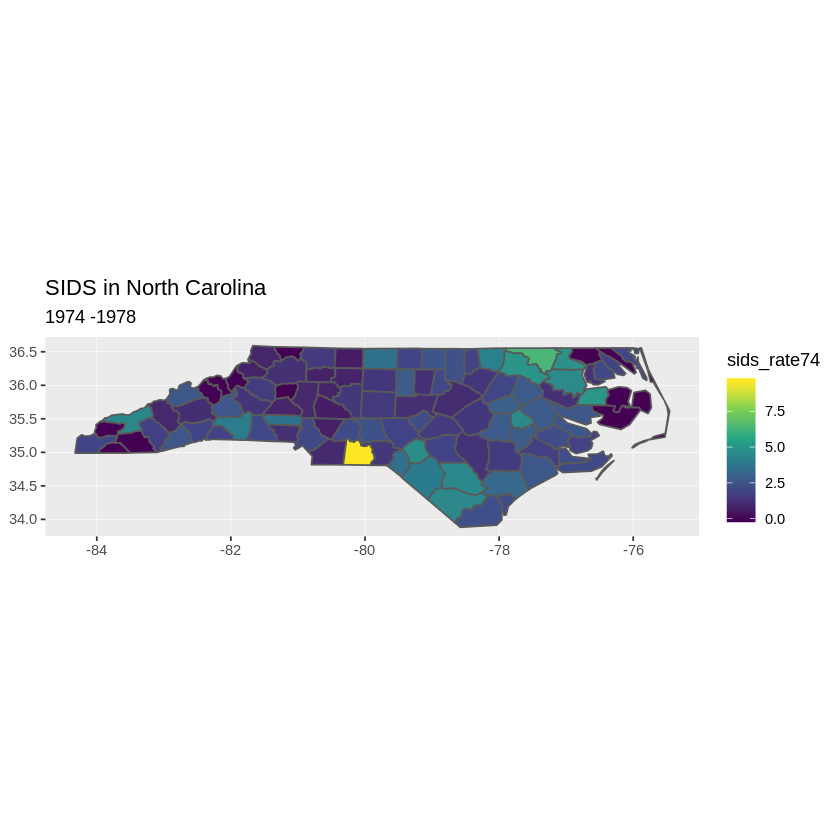

In [10]:
map <- map + ggtitle("SIDS in North Carolina", "1974 -1978")
map

Change the legend title and place it below the map

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


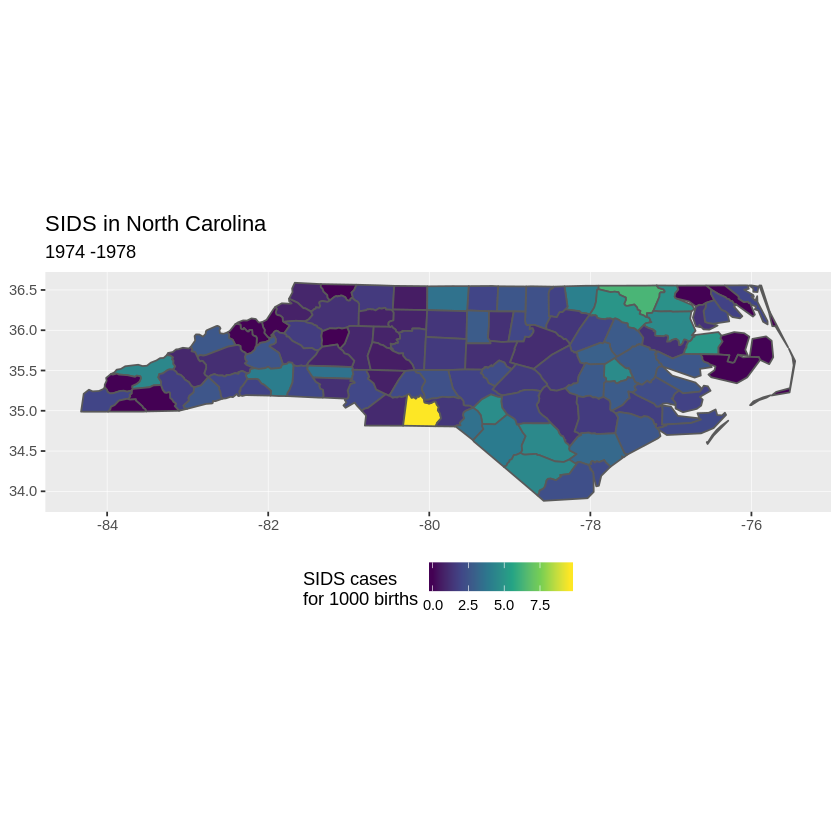

In [11]:
map <- map + scale_fill_viridis_c(name = "SIDS cases \nfor 1000 births") + 
    theme(legend.position = "bottom")
map

Remove the labels for x and y axis

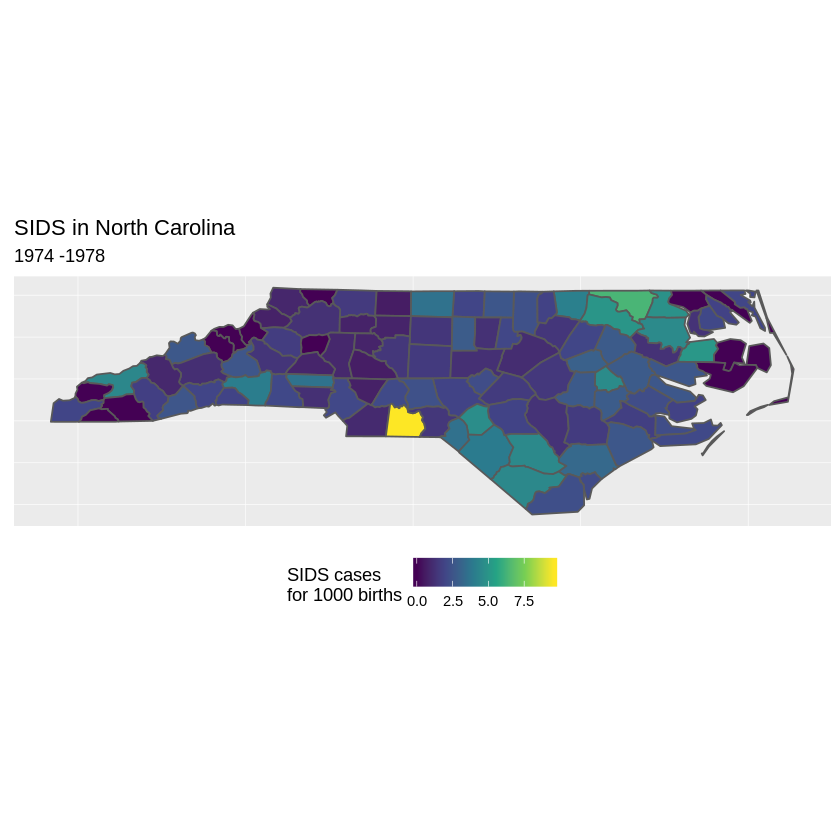

In [12]:
map <- map + theme(axis.title.x = element_blank(),axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.title.y = element_blank(),axis.text.y = element_blank(), axis.ticks.y = element_blank())
map

## What's next ?

Some packages are not provided here, but you can use an OpenStreetMap basemap using Leaflet and make it more intractive for example.

Try to reproduce with the data from 1979 to 1984 (*hint*: use SID79 and BIR79).

There is a lot of documentation regarding R spatial  but you might want to take a look at those ressources:

* [Geocomputation with R](https://geocompr.robinlovelace.net/) by Robin Lovelace, Jakub Nowosad, Jannes Muenchow
* [R Spatial](http://www.rspatial.org/) by Edzer Pebesma
* [Introduction to mapping with {sf} & Co. ](https://statnmap.com/2018-07-14-introduction-to-mapping-with-sf-and-co/) on spatial analysis with R by Sebastien Rochette